In [ ]:
#Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

Principal Component Analysis

a. Apply PCA on CC dataset.

b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has
improved or not?

c. Perform Scaling+PCA+K-Means and report performance.






In [ ]:
#Reading the data from the CC dataset.

dataset=pd.read_csv('CC.csv')
dataset.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
#Filling the null values in the dataset with the mean, by using the imputer.

X = dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [ ]:
#1-a. Applying PCA on CC dataset

pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head(10)

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0
5,-1910.333303,931.459400,12.0
6,10923.836807,4046.347940,12.0
7,-2497.208107,165.253534,12.0
8,730.473787,-1211.649713,12.0
9,3680.957478,-2054.986577,12.0


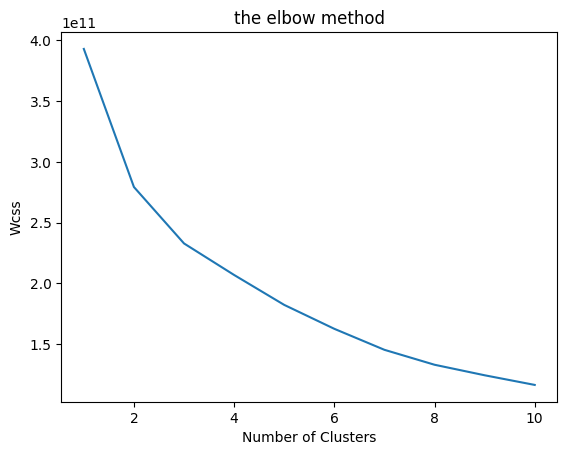

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [ ]:
# Applying k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?
nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
#Printing out the Silhoutte score
print('Silhoutte score for just PCA:',score)

Silhoutte score for just PCA: 0.5071212007776187


In [ ]:
#Reloading the dataset again
X = cc_dataset.iloc[:,1:]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)

X = imputer.transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [ ]:
#Applying the scaling on the dataset

scaler = StandardScaler()
scaler.fit(X)
x_scaler = scaler.transform(X)

#Applying the PCA with k value as 2 again

pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_dataset[['TENURE']]],axis=1)
finaldf.head()

,0,1,TENURE
0,-1.682220,-1.076449,12
1,-1.138293,2.506486,12
2,0.969690,-0.383518,12
3,-0.873629,0.043169,12
4,-1.599434,-0.688581,12


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
noofclusters = 4
km = KMeans(n_clusters=noofclusters)
km.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
y_cluster_kmeans = km.predict(x_pca)
#Finding out the silhouette score
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for scaled=pca=keans:',score)

Silhoutte score for scaled=pca=keans: 0.3286834035838682


Use pd_speech_features.csv

a. Perform Scaling

b. Apply PCA (k=3)

c. Use SVM to report performance

In [ ]:
speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
#Applying the scaling on the dataset

x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

#Applying PCA with value 3

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052430  1.476817  -6.828358      1
1   -10.641066  1.590405  -6.811685      1
2   -13.520081 -1.243924  -6.794535      1
3    -9.142526  8.848866  15.300276      1
4    -6.758091  4.624220  15.645670      1
..         ...       ...        ...    ...
751  22.377449  6.470191   1.439466      0
752  13.503269  1.450485   9.344867      0
753   8.328507  2.392514  -0.911234      0
754   4.074595  5.417630  -0.847065      0
755   4.052810  6.076472  -2.022274      0

[756 rows x 4 columns]


In [ ]:
#Applying the SVM classifier

clf = SVC(kernel='linear')
x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

SVM accuracy = 0.768


In [ ]:
#Classification report for the above classifier

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



In [ ]:
#3 Reading the IRIS dataset
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#apply the standard scaling

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(iris_df.iloc[:,:-1].values)

#Label encoding the species column
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

#Applying LDA on the Datset

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()


,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


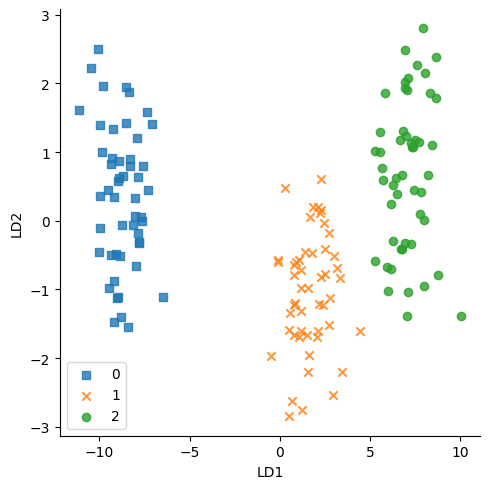

In [ ]:
markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()